In [1]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
#from tabulate import tabulate
from urllib.parse import urlparse, parse_qsl
import matplotlib
#matplotlib.use('pgf')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import django
from django.db.models import Count
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from utils.text import *
from utils.plotting import *
from sklearn.feature_extraction.text import *
from sklearn.decomposition import NMF
from scipy.sparse import coo_matrix, find
from django.db.models import Q, F, Sum, Count, FloatField, Case, When

from run_id import run_id
run_id = 665
stat = RunStats.objects.get(pk=run_id)
q = stat.query
print(q.title)
from tmv_app.tasks import *
from utils.text import *




#figisze = 183mm


wos_all_updated


In [2]:
yscores = TimeDTopic.objects.filter(
        dtopic__run_id=run_id,
        share__isnull=False,
).order_by('period__n','pgrowth').values('period__n','dtopic__id','dtopic__title','score','share')

df = pd.DataFrame.from_dict(list(yscores))
df['share'] = df['share'] * 100

df.head()

,dtopic__id,dtopic__title,period__n,score,share
0,11017,"{rice, paddi, straw}",1,0.658598,1.076433
1,11038,"{ghg, greenhous, emiss}",1,0.000000,0.000000
2,11091,"{ecosystem, function, ecolog}",1,0.496216,0.811031
3,11039,"{phenolog, flower, time}",1,0.155670,0.254431
4,11082,"{polici, govern, tax}",1,0.331906,0.542478


['{thermal, toler, stress}', '{biochar, amend, applic}', '{habitat, conserv, area}', '{extrem, event, weather}', '{yield, wheat, grain}', '{wast, materi, landfil}', '{adsorpt, captur, process}', '{china, industri, monsoon}', '{coastal, mangrov, rise}', '{urban, citi, area}']


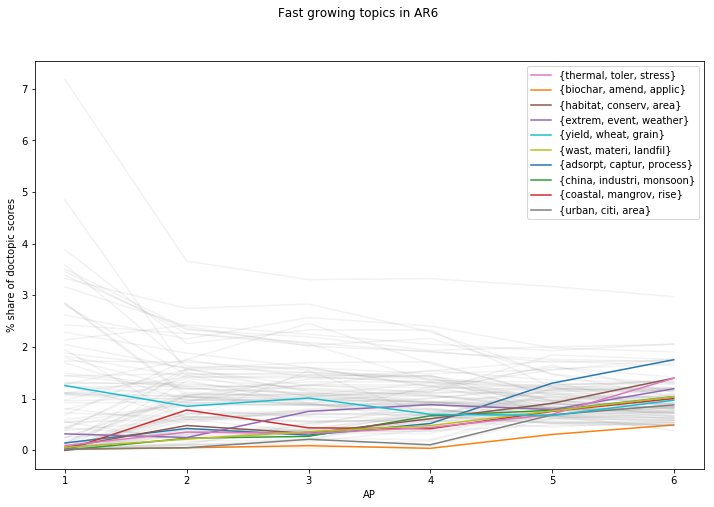

In [3]:
plt.rcParams["figure.figsize"] = (12,7.5)

topics = DynamicTopic.objects.filter(
    run_id=run_id,timedtopic__period__title="AR6"
).order_by('-timedtopic__pgrowth')[:10].values_list('title',flat=True)
plots = []
plots = [x for x in topics]
print(plots)
lvalues = [x for x in topics]
for name, group in df.groupby('dtopic__title'):
    #group = group.set_index('period__n')
    if name in topics:      
        p = plt.plot(group['period__n'],group['share'])
        for i, pl in enumerate(plots):
            if pl ==name:
                plots[i] = p[0]
        lvalues.append(name)
    else:
        plt.plot(group['period__n'],group['share'],color="grey",alpha=0.1)

        

plt.legend(plots,lvalues,title='')
plt.suptitle("Fast growing topics in AR6")
plt.xlabel('AP')
plt.ylabel('% share of doctopic scores')

plt.savefig('../plots/ar6_growth_{}.png'.format(run_id),bbox_inches='tight')
plt.show()

['{biochar, amend, applic}', '{servic, ecosystem, provis}', '{urban, citi, area}', '{build, construct, design}', '{food, agricultur, secur}', '{ghg, greenhous, emiss}', '{adsorpt, captur, process}', '{groundwat, runoff, hydrolog}', '{inject, storag, reservoir}', '{vehicl, transport, electr}']


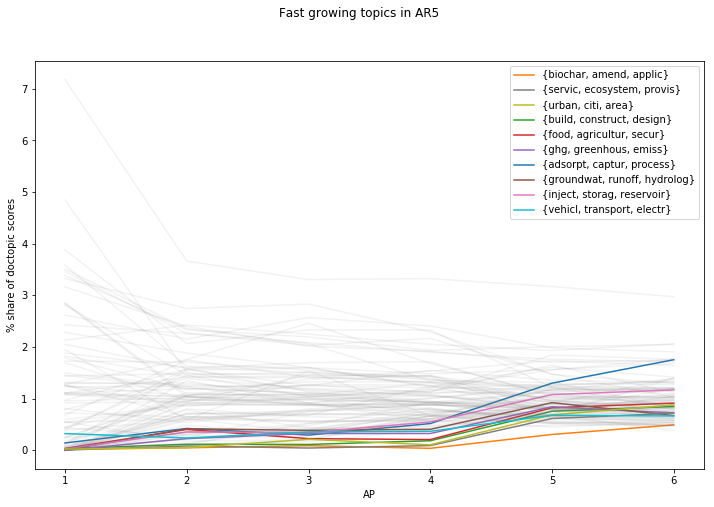

In [4]:
plt.rcParams["figure.figsize"] = (12,7.5)

topics = DynamicTopic.objects.filter(
    run_id=run_id,timedtopic__period__title="AR5"
).order_by('-timedtopic__pgrowth')[:10].values_list('title',flat=True)
plots = []
plots = [x for x in topics]
print(plots)
lvalues = [x for x in topics]
for name, group in df.groupby('dtopic__title'):
    #group = group.set_index('period__n')
    if name in topics:      
        p = plt.plot(group['period__n'],group['share'])
        for i, pl in enumerate(plots):
            if pl ==name:
                plots[i] = p[0]
        lvalues.append(name)
    else:
        plt.plot(group['period__n'],group['share'],color="grey",alpha=0.1)

        

plt.legend(plots,lvalues,title='')
plt.suptitle("Fast growing topics in AR5")
plt.xlabel('AP')
plt.ylabel('% share of doctopic scores')

plt.savefig('../plots/ar5_growth_{}.png'.format(run_id),bbox_inches='tight')
plt.show()